In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

import pickle
import torch
import torch.nn as nn

In [52]:
class ConvPool(nn.Module):
    def __init__(self,input_channel,output_channel,kernel_size,stride,padding):
        super(ConvPool, self).__init__()
        self.conv = nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, stride=stride, padding=padding)
        # self.batchnorm = nn.BatchNorm2d(output_channel) 
        self.max = nn.MaxPool2d(3, stride=2,padding=0)

        # self.localnorm = nn.LocalResponseNorm(5,alpha=1e-4,beta=0.75,k=2)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.conv(x)
        # x = self.batchnorm(x)
        x = self.max(x)

        # x = self.localnorm(x)
        x = self.relu(x)
        return x

class Conv(nn.Module):
    def __init__(self,input_channel,output_channel,kernel_size,stride,padding):
        super(Conv, self).__init__()
        self.conv = nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        # x = self.localnorm(x)
        x = self.relu(x)
        return x

class fullconnect(nn.Module):
    def __init__(self,input_channel,output_channel):
        super(fullconnect, self).__init__()
        self.fc = nn.Linear(input_channel,output_channel)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        return x
    
class AlexnetSmaller(nn.Module):
    def __init__(self,input_channel):
        super(AlexnetSmaller, self).__init__()
        self.conv1 = ConvPool(input_channel,64,3,1,1)
        self.conv2 = ConvPool(64,96,3,1,1)
        self.conv3 = ConvPool(96,256,3,1,1)
        # self.maxpool = nn.MaxPool2d(3, stride=2)
        # self.conv4 = ConvPool(64,64,3,1,1)
        # self.conv5 = Conv(64,128,3,1,1)
        # self.conv6 = ConvPool(128,128,3,1,1)
        # self.fc1 = fullconnect(1024,192)

        self.fc1 = nn.Linear(1024, 10)  # 10-way classification

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # x = self.maxpool(x)
        # x = self.conv4(x)
        # x = self.conv5(x)
        # x = self.conv6(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        # x = self.fc2(x)

        return x

In [2]:
# class Conv01(nn.Module):
#     def __init__(self,input_channel,output_channel,kernel_size,stride,padding):
#         super(Conv01, self).__init__()
#         self.conv = nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, stride=stride, padding=padding)
#         self.max = nn.MaxPool2d(3, stride=2,padding=0)
#         self.localnorm = nn.LocalResponseNorm(5,alpha=1e-4,beta=0.75,k=2)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.max(x)
#         x = self.localnorm(x)
#         x = self.relu(x)
#         return x
    
# class fullconnect(nn.Module):
#     def __init__(self,input_channel,output_channel):
#         super(fullconnect, self).__init__()
#         self.fc = nn.Linear(input_channel,output_channel)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.fc(x)
#         x = self.relu(x)
#         return x
    
# class AlexnetSmall(nn.Module):
#     def __init__(self,input_channel):
#         super(AlexnetSmall, self).__init__()
#         self.conv1 = Conv01(input_channel,128,5,1,2)
#         self.conv2 = Conv01(128,256,5,1,2)
#         self.maxpool = nn.MaxPool2d(3, stride=2)

#         self.fc1 = fullconnect(1024,384)
#         self.fc2 = fullconnect(384,192)
#         self.fc3 = nn.Linear(192, 10)  # 10-way classification

#     def forward(self, x):
#         x = self.conv1(x)
#         # print('conv1 done',x.shape)
#         x = self.conv2(x)
#         # print('conv2 done',x.shape)
#         x = self.maxpool(x)
#         # print('max pool is done',x.shape)
#         x = torch.flatten(x,1)
#         # print('x dimension after flattening',x.shape)
#         x = self.fc1(x)
#         # print('fc1 done')
#         x = self.fc2(x)
#         # print('fc2 done')
#         x = self.fc3(x)
#         # print('fc3 done')
#         return x

In [4]:
# class Conv(nn.Module):
#     def __init__(self,input_channel,output_channel,kernel_size,stride,padding):
#         super(Conv, self).__init__()
#         self.conv = nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, stride=stride, padding=padding)
#         self.batchnorm = nn.BatchNorm2d(output_channel) 
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.batchnorm(x)
#         x = self.relu(x)
#         return x
    
# class Inception(nn.Module):
#     def __init__(self, input_channel, output1, output3):
#         super(Inception,self).__init__()
#         self.branch1 = Conv(input_channel, output1, 1, 1,padding=0)
#         self.branch3 = Conv(input_channel, output3, 3, 1,padding=1)

#     def forward(self, x):
#         b1 = self.branch1(x)  
#         b3 = self.branch3(x) 
#         # print(b1.shape,b3.shape)
#         # Concatenate along the channel dimension
#         return torch.cat([b1, b3], dim=1)

# class Downsample(nn.Module):
#     def __init__(self, input_channel, output_channel):
#         super(Downsample,self).__init__()
#         self.branch_conv = Conv(input_channel, output_channel, 3, 2,padding=1)
#         self.branch_pool = nn.MaxPool2d(3, stride=2,padding=1)

#     def forward(self, x):
#         b_conv = self.branch_conv(x)  
#         b_pool = self.branch_pool(x) 
#         # print(b_conv.shape,b_pool.shape)
#         # Concatenate along the channel dimension
#         return torch.cat([b_conv, b_pool], dim=1)

# class InceptionSmall(nn.Module):
#     def __init__(self,input_channel):
#         super(InceptionSmall, self).__init__()
#         self.initial_conv = Conv(input_channel, 96, 3, 1,1)  

#         # First Inception Block
#         self.inception1 = Inception(96, 32, 32)
#         self.inception2 = Inception(64, 32, 48)
#         self.downsample1 = Downsample(80, 80)

#         # Second Inception Block
#         self.inception3 = Inception(160, 112, 48)
#         self.inception4 = Inception(160, 96, 64)
#         self.inception5 = Inception(160, 80, 80)
#         self.inception6 = Inception(160, 48, 96)
#         self.downsample2 = Downsample(144, 96)

#         # Final Inception Block
#         self.inception7 = Inception(240, 176, 160)
#         self.inception8 = Inception(336, 176, 160)

#         # Classification Head
#         self.global_pool = nn.AvgPool2d(7)  # 7x7 kernel global pooling
#         self.fc = nn.Linear(336, 10)  # 10-way classification

#     def forward(self, x):
#         x = self.initial_conv(x)
#         # print('initial_conv done')
#         x = self.inception1(x)
#         # print('inception1 done')
#         x = self.inception2(x)
#         # print('inception2 done')

#         x = self.downsample1(x)
#         # print('downsample1 done')
#         x = self.inception3(x)
#         # print('inception3 done')

#         x = self.inception4(x)
#         # print('inception4 done')

#         x = self.inception5(x)
#         # print('inception5 done')

#         x = self.inception6(x)
#         # print('inception6 done')

#         x = self.downsample2(x)
#         # print('downsample2 done',x.shape)
#         x = self.inception7(x)
#         # print('inception7 done')

#         x = self.inception8(x)
#         # print('inception8 done')

#         x = self.global_pool(x)
#         # print('global_pool done')
#         # print(x.shape)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
#         return x

In [5]:
# class Conv03(nn.Module):
#     def __init__(self,input_channel,output_channel,kernel_size,stride,padding):
#         super(Conv03, self).__init__()
#         self.conv = nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, stride=stride, padding=padding)   
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.relu(x)
#         return x

# class CNN(nn.Module):
#     def __init__(self,input_channel):
#         super(CNN, self).__init__()
#         self.conv1 = Conv03(input_channel,128,3,1,1)
#         self.conv2 = Conv03(128,144,3,1,1)
#         self.conv3 = Conv03(144,96,3,1,1)



#         self.fc = nn.Linear(46464,10)

#     def forward(self, x):
#         x = self.conv1(x)
#         # print('conv1 done',x.shape)
#         x = self.conv2(x)
#         # print('conv2 done',x.shape)
#         x = self.conv3(x)
#         # print('conv3 done',x.shape)
#         x = torch.flatten(x, 1)
#         # print('after flattening',x.shape)
#         x = self.fc(x)
#         # print('fc done')


#         return x

In [3]:
dir00 = '/home/watson/Documents/CIFAR/cifar-10-python/cifar-10-batches-py/cifar-10-batches-py/small_inception/old_decay_factor/'
dir01 = '/home/watson/Documents/CIFAR/cifar-10-python/cifar-10-batches-py/cifar-10-batches-py/small_alexnet/old_decay_factor/'
result_samples = range(0,5000,10)
file_weights = 'model_weights4950.pth'


In [37]:
dir00 = '/home/watson/Documents/CIFAR/cifar-10-python/cifar-10-batches-py/cifar-10-batches-py/smaller_alexnet'
result_samples = range(0,5000,10)
file_weights = 'model_weights4950.pth'

sub_folder00 = ['true_labels_12-13-2024_00-12-13',
                'corrupt_labels_20_12-13-2024_00-12-13',
                'corrupt_labels_40_12-13-2024_00-12-16',
                'corrupt_labels_60_12-13-2024_00-12-09',
                'corrupt_labels_80_12-13-2024_00-12-07',
                'corrupt_labels_100_12-13-2024_00-12-07']

# sub_folder00 = ['true_labels_12-13-2024_16-03-25']
# sub_folder00 = ['true_labels_12-13-2024_00-11-02',
#                 'corrupt_labels_20_12-13-2024_00-11-05',
#                 'corrupt_labels_40_12-13-2024_00-11-06',
#                 'corrupt_labels_60_12-13-2024_00-11-03',
#                 'corrupt_labels_80_12-13-2024_00-11-03',
#                 'corrupt_labels_100_12-13-2024_00-11-02']

sub_folder00 = ['true_labels_12-13-2024_13-22-32',
                'corrupt_labels_20_12-13-2024_13-22-28',
                'corrupt_labels_40_12-13-2024_13-22-24',
                'corrupt_labels_60_12-13-2024_13-22-23',
                'corrupt_labels_80_12-13-2024_13-22-23',
                'corrupt_labels_100_12-13-2024_13-22-23']

sub_folder00 = ['true_labels_12-13-2024_16-03-25',
                'corrupt_labels_20_12-13-2024_16-03-28',
                'corrupt_labels_40_12-13-2024_16-03-19',
                'corrupt_labels_60_12-13-2024_16-03-18',
                'corrupt_labels_80_12-13-2024_16-03-19',
                'corrupt_labels_100_12-13-2024_16-03-22']

sub_folder00 = ['true_labels_12-14-2024_15-50-35',
                'corrupt_labels_20_12-14-2024_15-50-34',
                'corrupt_labels_40_12-14-2024_15-50-33',
                'corrupt_labels_60_12-14-2024_15-50-36',
                'corrupt_labels_80_12-14-2024_15-50-45',
                'corrupt_labels_100_12-14-2024_15-50-45']

# sub_folder00 = ['true_labels_12-14-2024_15-32-09',
#                 'corrupt_labels_20_12-14-2024_15-32-14',
#                 'corrupt_labels_40_12-14-2024_15-32-15',
#                 'corrupt_labels_60_12-14-2024_15-32-10',
#                 'corrupt_labels_80_12-14-2024_15-32-09',
#                 'corrupt_labels_100_12-14-2024_15-32-11']

sub_folder00 = ['true_labels_12-15-2024_00-21-10',
                'corrupt_labels_20_12-15-2024_00-21-07',
                'corrupt_labels_40_12-15-2024_00-21-07',
                'corrupt_labels_60_12-15-2024_00-21-06',
                'corrupt_labels_80_12-15-2024_00-21-06',
                'corrupt_labels_100_12-15-2024_00-21-11']

sub_folder00 = ['true_labels_12-15-2024_13-30-54',
                'corrupt_labels_20_12-15-2024_13-30-51',
                'corrupt_labels_40_12-15-2024_13-30-51',
                'corrupt_labels_60_12-15-2024_13-30-51',
                'corrupt_labels_80_12-15-2024_13-30-51',
                'corrupt_labels_100_12-15-2024_13-30-48']

In [95]:
# subfolder = '/home/watson/Documents/CIFAR/cifar-10-python/cifar-10-batches-py/model_data_mse_loss/small_alexnet/corrupt_labels_80_12-06-2024_17-58-02'
# file = 'arguments.pkl'
# directory = os.path.join(dir00,subfolder,file)
# with open(directory,'rb') as f:
#     arguments = pickle.load(f)
# print(arguments)

In [4]:
sub_folder00 = ['true_labels_12-03-2024_19-01-03',
              'corrupt_labels_20_12-03-2024_19-01-03',
              'corrupt_labels_40_12-03-2024_19-01-04',
              'corrupt_labels_60_12-03-2024_19-01-01',
              'corrupt_labels_80_12-03-2024_19-01-01',
              'random_labels_12-02-2024_17-21-40']

# sub_folder00 = ['true_labels_12-07-2024_22-53-49',
#               'corrupt_labels_20_12-08-2024_10-04-21',
#               'corrupt_labels_40_12-06-2024_17-32-49',
#               'corrupt_labels_60_12-06-2024_17-32-49',
#               'corrupt_labels_80_12-07-2024_22-53-41',
#               'corrupt_labels_100_12-06-2024_17-32-44']

# sub_folder00 = ['true_labels_12-06-2024_17-58-04',
#               'corrupt_labels_20_12-06-2024_17-58-04',
#               'corrupt_labels_40_12-08-2024_09-51-22',
#               'corrupt_labels_60_12-08-2024_09-51-19',

#               'corrupt_labels_100_12-07-2024_22-48-25']

In [5]:
sub_folder01 = ['true_labels_12-03-2024_19-00-34',
              'corrupt_labels_20_12-03-2024_19-00-33',
              'corrupt_labels_40_12-03-2024_19-00-33',
              'corrupt_labels_60_12-03-2024_19-00-32',
              'corrupt_labels_80_12-03-2024_19-00-38',
              'random_labels_12-02-2024_17-21-21']

# sub_folder01 = ['true_labels_12-06-2024_17-32-40',
#               'corrupt_labels_20_12-06-2024_17-32-28',
#               'corrupt_labels_40_12-06-2024_17-32-27',
#               'corrupt_labels_60_12-06-2024_17-32-35',
#               'corrupt_labels_80_12-06-2024_17-32-36',
#               'corrupt_labels_100_12-06-2024_17-32-45']

# sub_folder01 = ['true_labels_12-06-2024_17-57-54',
#               'corrupt_labels_20_12-06-2024_17-58-09',
#               'corrupt_labels_40_12-06-2024_17-57-56',
#               'corrupt_labels_60_12-06-2024_17-58-02',
#               'corrupt_labels_80_12-06-2024_17-58-02',
#               'corrupt_labels_100_12-06-2024_17-58-03']

Text(0.5, 1.0, 'smaller AlexNet model')

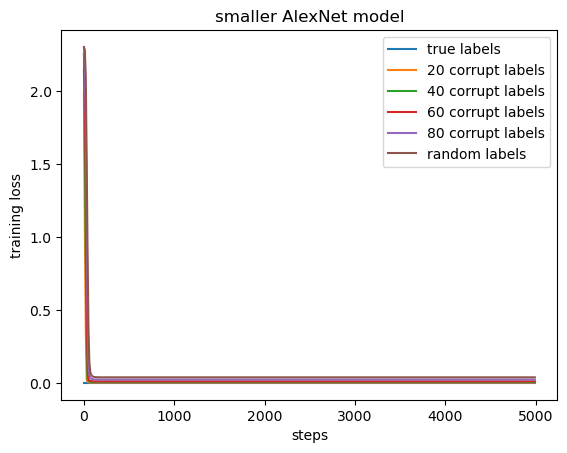

In [38]:
losses = []
plt.figure()
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    file_results = 'file4350.pkl'
    directory = dir00 + os.sep + sub_folder00[0]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)

plt.plot(result_samples,losses)

losses = []
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir00 + os.sep + sub_folder00[1]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)
plt.plot(result_samples,losses)

losses = []
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir00 + os.sep + sub_folder00[2]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)
plt.plot(result_samples,losses)

losses = []
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir00 + os.sep + sub_folder00[3]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)
plt.plot(result_samples,losses)

losses = []
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir00 + os.sep + sub_folder00[4]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)
plt.plot(result_samples,losses)

losses = []
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir00 + os.sep + sub_folder00[5]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)

plt.plot(result_samples,losses)
plt.legend(['true labels','20 corrupt labels','40 corrupt labels','60 corrupt labels','80 corrupt labels','random labels'])
plt.xlabel('steps')
plt.ylabel('training loss')
plt.title('smaller AlexNet model')

Text(0, 0.5, 'test error')

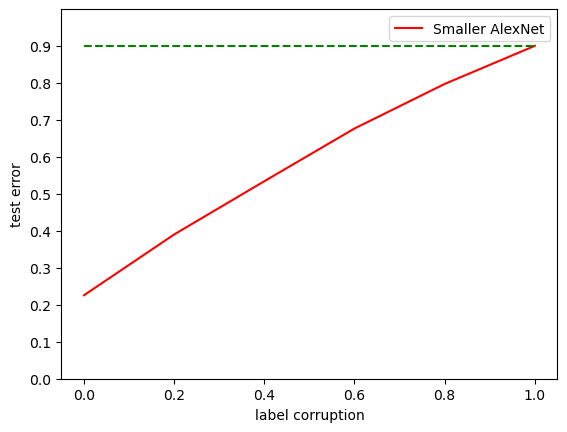

In [54]:
errors = []
plt.figure()
for i in range(len(sub_folder00)):
    file_results = 'file4999.pkl'
    directory = dir00 + os.sep + sub_folder00[i]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    errors.append(1-results[2])
errors = np.array(errors)

plt.plot(np.arange(0,1.2,0.2),errors,'r')

plt.plot(np.arange(0,1.2,0.2),np.ones(len(sub_folder00))*0.9,'--g')
plt.ylim([0,1])
plt.yticks(np.arange(0,1,0.1))
plt.legend(['Smaller AlexNet'])
plt.xlabel('label corruption')
plt.ylabel('test error')

In [ ]:
errors = []
for i in range(len(sub_folder01)):
    file_results = 'file4999.pkl'
    directory = dir01 + os.sep + sub_folder01[i]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    errors.append(1-results[2])
errors = np.array(errors)
plt.plot(np.arange(0,1.2,0.2),errors,'b')
plt.plot(np.arange(0,1.2,0.2),np.ones(len(sub_folder01))*0.9,'--g')
plt.ylim([0,1])
plt.yticks(np.arange(0,1,0.1))
plt.legend(['Inception','AlexNet'])
plt.xlabel('label corruption')
plt.ylabel('test error')

In [ ]:
plt.figure()
norm = np.ones(len(sub_folder00))
for i in range(len(sub_folder00)):
    directory = dir00 + os.sep + sub_folder00[i]
    weights_dir = directory + os.sep + file_weights
    model = InceptionSmall(3)
    model.load_state_dict(torch.load(weights_dir,weights_only=True))

    for layer in model.children():
        layer_sum = 0
        for name,param in layer.named_parameters():

            layer_sum += np.sum(torch.detach(param).numpy()**2)
        if layer_sum == 0:
            layer_sum =1
        print(np.sqrt(layer_sum))
        norm[i] *= np.sqrt(layer_sum)
    print(i,norm[i])

norm = norm/np.sqrt(50000)
plt.plot(np.arange(0,1.2,0.2),norm,'r')
plt.legend(['Inception'])
plt.xlabel('label corruption')
plt.ylabel('p(w)/sqrt(m)')


In [ ]:
norm = np.ones(len(sub_folder01))
for i in range(len(sub_folder01)):
    directory = dir01 + os.sep + sub_folder01[i]
    weights_dir = directory + os.sep + file_weights
    model = AlexnetSmall(3)
    model.load_state_dict(torch.load(weights_dir,weights_only=True))

    for layer in model.children():
        layer_sum = 0
        for name,param in layer.named_parameters():

            layer_sum += np.sum(torch.detach(param).numpy()**2)
        if layer_sum == 0:
            layer_sum =1
        print(np.sqrt(layer_sum))
        norm[i] *= np.sqrt(layer_sum)
    print(i,norm[i])

norm = norm/np.sqrt(50000)
print(norm)
plt.plot(np.arange(0,1.2,0.2),norm,'b')

plt.legend(['AlexNet'])
plt.xlabel('label corruption')
plt.ylabel('p(w)/sqrt(m)')

In [ ]:
plt.figure()
norm = np.ones(len(sub_folder00))
for i in range(len(sub_folder00)):
    directory = dir00 + os.sep + sub_folder00[i]
    weights_dir = directory + os.sep + file_weights
    model = CNN(3)
    checkpoint = torch.load(weights_dir,weights_only=True)
    model.load_state_dict(checkpoint['model_state_dict'])

    for layer in model.children():
        layer_sum = 0
        for name,param in layer.named_parameters():

            layer_sum += np.sum(torch.detach(param).numpy()**2)
        if layer_sum == 0:
            layer_sum =1
        print(np.sqrt(layer_sum))
        norm[i] *= np.sqrt(layer_sum)
    print(i,norm[i])

norm = norm/np.sqrt(50000)
plt.plot(np.arange(0,1.2,0.2),norm,'r')
plt.legend(['Inception'])
plt.xlabel('label corruption')
plt.ylabel('p(w)/sqrt(m)')


In [ ]:
losses = []
plt.figure()
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir01 + os.sep + sub_folder01[0]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)

plt.plot(result_samples,losses,'r')

losses = []
for i in result_samples:
    file_results = 'file'+str(i)+'.pkl'
    directory = dir01 + os.sep + sub_folder01[-1]
    results_dir = directory + os.sep + file_results
    with open(results_dir,'rb') as f:
        results = pickle.load(f)
    losses.append(results[1])
losses = np.array(losses)
plt.plot(result_samples,losses,'b')
plt.legend(['true labels','random labels'])
plt.xlabel('steps')
plt.ylabel('training loss')
plt.title('small AlexNet model')

0 18868.454415142784
1 33857.03447131017
2 40981.229062804654
3 42044.15403284607
4 35826.69229855847
5 29440.81939951839
[ 84.38229341 151.41326119 183.27362797 188.02717295 160.22183878
 131.66334698]


Text(0, 0.5, 'p(w)/sqrt(m)')

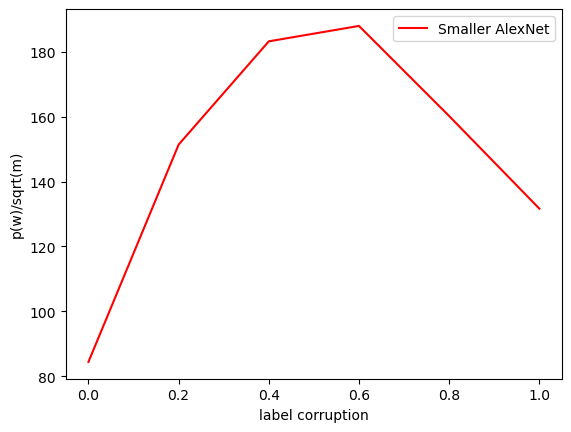

In [53]:
# plt.figure()
# norm = np.ones(1)

# directory = dir00 + os.sep + sub_folder00[0]
# weights_dir = directory + os.sep + file_weights
# model = AlexnetSmaller(3)
# checkpoint = torch.load(weights_dir,weights_only=True)
# model.load_state_dict(checkpoint['model_state_dict'])

# for layer in model.children():
#     layer_sum = 0
#     for name,param in layer.named_parameters():
#         # print(name)

#         layer_sum += np.sum(torch.detach(param).numpy()**2)
#     if layer_sum == 0:
#         layer_sum =1
#     print(np.sqrt(layer_sum))
#     norm *= np.sqrt(layer_sum)

# norm = norm/np.sqrt(50000)
# print(norm)


plt.figure()
norm = np.ones(len(sub_folder00))
for i in range(len(sub_folder00)):
    directory = dir00 + os.sep + sub_folder00[i]
    weights_dir = directory + os.sep + file_weights
    model = AlexnetSmaller(3)
    checkpoint = torch.load(weights_dir,weights_only=True)
    model.load_state_dict(checkpoint['model_state_dict'])

    for layer in model.children():
        layer_sum = 0
        for name,param in layer.named_parameters():

            layer_sum += np.sum(torch.detach(param).numpy()**2)
        if layer_sum == 0:
            layer_sum =1
        
        norm[i] *= np.sqrt(layer_sum)
    print(i,norm[i])

norm = norm/np.sqrt(50000)
print(norm)
plt.plot(np.arange(0,1.2,0.2),norm,'r')
plt.legend(['Smaller AlexNet'])
plt.xlabel('label corruption')
plt.ylabel('p(w)/sqrt(m)')